In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
# pip install soynlp

In [51]:
import pandas as pd
import numpy as np
import re

In [52]:
df = pd.read_csv('C:/Users/admin/Documents/PythonStudy0/Pandas/source/Upgarde/petition/petition.csv', parse_dates=['start', 'end'])

In [53]:
df.loc[df['category'] == '기타']

,article_id,start,end,answered,votes,category,title,content
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
13,34,2017-08-19,2017-09-18,0,679,기타,『국가유공자 등 예우 및 지원에 관한법률』상「6.25전몰군경 자녀수당」의 불합리한 ...,(현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...
16,37,2017-08-19,2017-09-18,0,415,기타,황우석박사님 연구재개 허용 촉구합니다.,국민의 70% 이상이 황우석박사님을 응원하고 지지하고 있습니다.\n*2007년 1월...
65,88,2017-08-20,2017-11-18,0,2,기타,스피커즈 코너를 설치해 주세요.,광화문 같이 잘 알려져 있고 유동인구가 많은 곳에 스피커즈 코너 (Speaker's...
73,97,2017-08-20,2017-08-27,0,2,기타,문재인 대통령 나으리 청와대에 자살폭탄 테러를 해도 되겠습니까?,저주스런 욕설이 목까지 차오르지만 어디엔가 남아 있을지 모르는\n내 마지막 인내심과...
...,...,...,...,...,...,...,...,...
395522,517089,2019-02-04,2019-03-06,0,1,기타,선진국 민생탐방 -> 한국 민생탐방 -> 상설국회 법제화 -> 실질적 성과,"참여대상 : 중앙의 국회의원, 지방의 지방의원을 포함한 모든 정치인들과 정치 예비 ..."
395528,517097,2019-02-04,2019-03-06,0,3,기타,집매매,대통령님 집값을 안정시키는건좋은대요 전일시적 2주택이되어서 새로매매된집으로 ...
395529,517098,2019-02-04,2019-03-06,0,5,기타,사이버상 거래사기,사이버상에서의 사기중 소액을 당했을 경우 너무 수사가 미비합니다. 몇만원이든 몇백몇...
395533,517104,2019-02-04,2019-03-06,0,0,기타,결과 비핵화와 검증과 종전선언 제재완화의 과정별 보상 빅달^^@,비건\n외교관도 아니고\n전문가도 아니고\n사업가적 사고와\n비즈니스적 발상으로\n...


In [54]:
import re
p = r'.*(돌봄|아이|초등|보육).*'
care = df[df['title'].str.match(p) |
         df['content'].str.match(p, flags=re.MULTILINE)]
care.shape

(47490, 8)

In [55]:
care.head()

,article_id,start,end,answered,votes,category,title,content
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
15,36,2017-08-19,2017-08-26,0,1,인권/성평등,한국채식인구 100만명. 학교 급식 및 군대에서 현미채식 선택권을 보장해주십시오!,문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...
20,42,2017-08-19,2017-09-18,0,173,육아/교육,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
21,43,2017-08-19,2017-09-18,0,11293,육아/교육,기간제 교사의 정규직화를 반대합니다.,"대통령님, 안녕하세요. 저는 임용을 준비하고 수험생입니다. 처음 기간제 정규직화 된..."
23,45,2017-08-19,2017-11-17,0,0,육아/교육,초등학교 교사 임용 시험 관련 해결방안,초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에\n1지망 2...


In [56]:
care['title'][15]

'한국채식인구 100만명. 학교 급식 및 군대에서 현미채식 선택권을 보장해주십시오!'

In [57]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()

In [58]:
sample_index =15

In [59]:
sample_title = care['title'][sample_index]
sample_title

'한국채식인구 100만명. 학교 급식 및 군대에서 현미채식 선택권을 보장해주십시오!'

In [60]:
sample_content = care['content'][sample_index]
sample_content

'문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국의 국민의 한사람으로써 너무나 자랑스럽고, 문재인 대통령님께서 저희를 대표해 말씀하실때 너무나 큰 감동을 받습니다. 너무나 감사합니다.\\n한국에도 채식 인구가 100만명이 넘었다고 합니다.\\n하지만, 그런 인구들의 가장 기본적인 먹는 것에 관한 권리가 보장되지 못하고 있습니다.\\n1. 초등~ 고등학생들에게는 급식을 할때,\\n2. 사회에 나와서는 사회생활을 할때 (회식),\\n3. 군대에 갔을때,\\n4. 가족생활을 할때 (결혼식, 황갑잔치, 가족외식등..)\\n위의 1~ 4번중 한 사람이 태어나 4가지중 적어도 1~2개, 많게는 모든 과정을 겪습니다.\\n채식주의 국민들에게 "모든 학교, 군대 ( 병원, 산후조리원등 ) 에서 현미채식 선택권을" 보장해야 함은 선택이 아닌 필수입니다.\\n계란, 우유, 멸치도 먹지 않는 채식주의중 한 종류인 Vegan 중의 한사람으로써\\n성소수자와 마찬가지로 일상생활의 불편함을 많이 느낍니다. 식당을 꼭 가야만 하는 접대자리, 사회생활 회식자리, 가족모임, 남자분 같은 경우 군대, 아이들같은 경우 학교 급식과 같이 피할수 없는 이런 경우에는 정말로 방법이 없습니다. 아직 정체성이 확실하지 않은 아이들에게는 동물을 죽이고싶지 않아 고기를 먹지 않겠다고 마음먹지만, 학교 급식에서 나오는 대부분의 반찬에 모두 고기나 멸치가 들어갑니다.\\n예를들어, 인천 여자중학교 2017. 8월. 18일 급식입니다.\\n-> 차수수밥/쇠고기육개장/고등어살오븐구이/메추리알감자조림/배추김치/슈퍼볼쿠키\\nVegan 인 학생이 먹을 수 있는 반찬은 하나도 없습니다. 배추김치 속의 멸치 젓갈이나 국에 사용하는 멸치 다시용 등도 먹지 않기 때문입니다.\\n이런 Vegan 내지 Vegetarianism을 선택하는 한국인이 100만명이라면 군대를 가고, 급식을 먹어야 할때\\n그들은 어떻게 해야합니까?  개인적으로 초등학교 1학년, 4학년 저희 조카는 벌써 군대를 걱정

# 토근화

In [61]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['한국채식인구',
 '100',
 '만명',
 '.',
 '학교',
 '급식',
 '및',
 '군대에서',
 '현미채식',
 '선택권을',
 '보장해주십시오',
 '!']

In [62]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['문재인', '대통령님과', '각', '정부', '인사분들께', '마음속', '깊이', '존경과', '감사를', '표합니다']

# 텍스트 데이터 전처리

In [63]:
def preprocessing(text):
    #개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    return text

In [64]:
# %time 함수를 적어주면 해당 코드를 실행항때 걸리는 시간을 출력해준다
%time sentences = care['content'].apply(preprocessing)

Wall time: 226 ms


In [65]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

Wall time: 55.5 s


3     [현정부에서, 정규직, 일자리를, 늘리는, 것에, 찬성합니다, ., 그런데, 공공기...
15    [문재인, 대통령님과, 각, 정부, 인사분들께, 마음속, 깊이, 존경과, 감사를, ...
20    [대통령님, ,, 안녕하세요, ., 저는, 임용을, 준비하고, 수험생입니다, ., ...
Name: content, dtype: object

In [66]:
tokens[sample_index][:10]

['문재인', '대통령님과', '각', '정부', '인사분들께', '마음속', '깊이', '존경과', '감사를', '표합니다']

In [67]:
stopwords_kr = ['하지만', '그리고', '그런데', '저는', '제가',
               '그럼', '이런', '저런', '합니다', '많은', '많이', '정말', '너무']

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600):
    wordcloud = WordCloud(
                    font_path = 'C:/Windows/Fonts/HMFMPYUN.ttf',
                    stopwords = stopwords_kr,
                    background_color = backgroundcolor,
                    width = width , 
                    height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

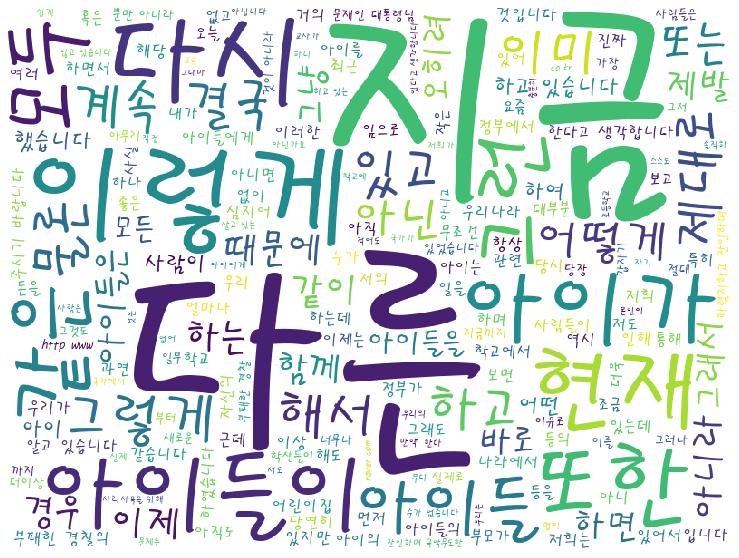

Wall time: 1min 4s


In [85]:
# 결과를 출력해 보면 불용어가 너무 많습니다
%time displayWordCloud(' '.join(sentences))

In [86]:
from soynlp.noun import LRNounExtractor

In [87]:
%%time
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
#명사만 추출
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (327247, 164804) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 56740 nouns are extracted
Wall time: 1min 54s


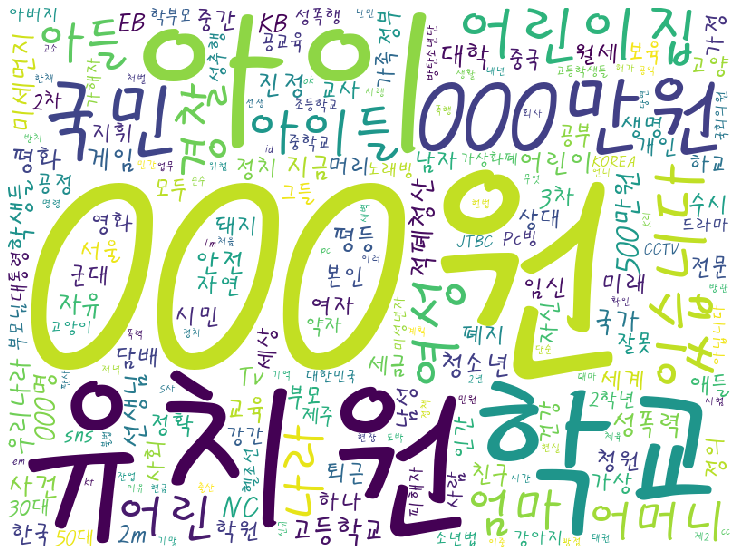

Wall time: 2.07 s


In [88]:
# 추출된 명사를 찍어본다
%time displayWordCloud(' '.join(nouns))

In [89]:
p = r'.*(P2P|은행|금융|주식|증권|공매도).*'
finance = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
finance.tail()

,article_id,start,end,answered,votes,category,title,content
395468,516999,2019-02-04,2019-03-06,0,2,정치개혁,우리은행채용비리-은행장 출감후보상처벌 및 색출요망!,우리은행채용비리-은행장 출감후보상처벌 및 색출요망!\n우리은행통장 만들려다 취소하고...
395476,517015,2019-02-04,2019-03-06,0,9,육아/교육,◆교육은 개천에서 용이 나올 수 있어야 된다!,◆교육은 개천에서 용이 나올 수 있어야 된다!\n지금 우리나라의 교육현실은 국민의 ...
395477,517018,2019-02-04,2019-03-06,0,3,경제민주화,◆재벌을 근본적으로 개혁하라!,◆재벌을 근본적으로 개혁하라!\n지금 우리나라는 재벌로의 경제력이 집중되어 소득불균...
395495,517046,2019-02-04,2019-03-06,0,2,미래,국민연금 대형 금융사고 !,국민연금 역대 최대의 금융 손실사고 ! 예상된 사고 입니다 !\n작년 1...
395504,517057,2019-02-04,2019-03-06,0,4,기타,안희정을 싫어하며 피해자다움을 강요할 수는 없지만..,안희정을 싫어하며 피해자다움을 강요할 수는 없지만..\n저는 안희정을 좋아하지 않습...


In [90]:
finance.head()

,article_id,start,end,answered,votes,category,title,content
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
11,32,2017-08-19,2017-09-03,0,30,경제민주화,소액주주 보호를 위해 조사요청 드립니다.,"존경하는 대통령님께,\n코스피 주식종목 중국 원양자원은 현재 계속되는 장** 대표이..."
54,77,2017-08-20,2017-09-04,0,53,교통/건축/국토,"안양시청, 안양지청, 재개발조합 적폐가 심해 수사가 안되고 있습니다. 안양시 지장물...","※지장물관련 국토부의 해석 : 기존 건축물의 철거 공사에 관한 사항의 범위는 전기,..."
68,91,2017-08-20,2017-09-19,0,165,경제민주화,증권 자본시장개정안(상장폐지법 개정안),존경하는 문제인 대통령님께\n먼저 어렵고 힘든 국정운영을 이끄시느라 노고가 많으십니...
100,124,2017-08-20,2017-08-27,0,1,기타,포스코 관련,안녕하십니까?\n최근 뉴스에 주목을 못 받는 뉴스가 있습니다. 아시아경제tv의 포스...


In [91]:
finance.tail()

,article_id,start,end,answered,votes,category,title,content
395468,516999,2019-02-04,2019-03-06,0,2,정치개혁,우리은행채용비리-은행장 출감후보상처벌 및 색출요망!,우리은행채용비리-은행장 출감후보상처벌 및 색출요망!\n우리은행통장 만들려다 취소하고...
395476,517015,2019-02-04,2019-03-06,0,9,육아/교육,◆교육은 개천에서 용이 나올 수 있어야 된다!,◆교육은 개천에서 용이 나올 수 있어야 된다!\n지금 우리나라의 교육현실은 국민의 ...
395477,517018,2019-02-04,2019-03-06,0,3,경제민주화,◆재벌을 근본적으로 개혁하라!,◆재벌을 근본적으로 개혁하라!\n지금 우리나라는 재벌로의 경제력이 집중되어 소득불균...
395495,517046,2019-02-04,2019-03-06,0,2,미래,국민연금 대형 금융사고 !,국민연금 역대 최대의 금융 손실사고 ! 예상된 사고 입니다 !\n작년 1...
395504,517057,2019-02-04,2019-03-06,0,4,기타,안희정을 싫어하며 피해자다움을 강요할 수는 없지만..,안희정을 싫어하며 피해자다움을 강요할 수는 없지만..\n저는 안희정을 좋아하지 않습...


In [92]:
# 샘플로 보고 싶은 인덱스의 번호를 넣어주세요
sample_index = 192190

In [93]:
sample_title = finance['title'][sample_index]
sample_title

'2009년도 탄생 적폐제도(?) 신속(조기)집행 폐지를 간절히 청원합니다.'

In [95]:
sample_content = finance['content'][sample_index]
sample_content

'2009년도 탄생 적폐제도(?) 신속(조기)집행 폐지를 간절히 청원합니다.\\n국민의 일원으로써, 일선지자체의 공무원으로써,\\n2009년도부터 실시되어 현재까지 시행중인 적폐 제도, 신속(조기,균형) 집행의 폐지를 청원합니다.\\n2008년 리먼사태로 세계 금융위기가 발생하였다는 이유로 2009년도에 시작된 조기집행...\\n(지극히 제 개인적인 생각입니다다만. 지나고 나서 돌아보니, 솔직히 그것 때문에 시작했다고 생각이 들지 않습니다.)\\n어찌되었든, 현재까지 10년동안 그 제도같지 않은 제도가 이름만 달리하면서(조기→균형→신속) 시행되고 있는 것으로 보아,\\n우리 국가는 매년을 급박한 경제위기속에서 신속(조기)집행으로 버티어 내고 있는 중인 것으로 보입니다.\\n또한, 해당 제도 시행의 근거로 제시되는 「상반기 어려운 고용상황 및 거시경제 불안요인 등에 대응」에 따르면, 우리 국가는 금방이라도 부도가 날 지경인 것 같습니다.\\n현재 우리 대한민국은 정말 그러한 상황인가 되묻고 싶습니다.\\n지난 10년동안 각종 폐해와 문제점이 지적되고 있음에도, 도대체 어떤 이유로 현재까지 시행이 되고 있는지 이유를 찾을 수가 없습니다.\\n각종 언론매체 등을 통해 제기된 부작용을 나열하면,\\n“단기간 과다한 공사발주로 부실 설계 우려”,\\n“지자체 이자 수입 감소와 재정 압박 초래”,\\n“발주 후 설계변경이나 중복 집행 등의 예산낭비”,\\n“공사가 단기간에 집중되면서 공사현장에서 인건비나 자재비가 급등”,\\n“획일적 조기집행의 추진은 지방재정 안정성을 저해”,\\n“중앙정부의 예산조기집행은 지방자치와 지방재정 건전성 문제에 위배”\\n등의 문제점이 전문가, 지자체장, 지방의원, 공무원 등에 의해 지속적으로 제기되어 왔습니다.\\n또한 행정안전부에서도 이미 그 폐해, 문제점을 인지하고 있습니다.\\n-2018년도 행정안전부 지방재정 신속집행 추진계획 3페이지\\n○자치단체, 지방의회, 공무원 단체 등에서 신속집행에 대한 문제점* 등을 들어 지속적으로 개선

In [111]:
def preprocessing(text):
    #개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때론 의미를 갖기도 하지만 여기에서는 제거했습니다
    # text = re.sub('[?.,;:/\)*~`'!^\-<>@\#$%-=#}]']', '', text)
    # 한글 영문 숫자만 남기고 모두 제거
    # text = re.sub('[^가-힣ㄱ-하-ㅣa-zA-Z0-9]', ' ', text)
    # 한글 영문만 남기고 모두 제거
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-z]', ' ', text)
    return text

In [112]:
sample_content = preprocessing(sample_content)
sample_content[:1000]

'    년도 탄생 적폐제도    신속 조기 집행 폐지를 간절히 청원합니다  국민의 일원으로써  일선지자체의 공무원으로써      년도부터 실시되어 현재까지 시행중인 적폐 제도  신속 조기 균형  집행의 폐지를 청원합니다      년 리먼사태로 세계 금융위기가 발생하였다는 이유로     년도에 시작된 조기집행     지극히 제 개인적인 생각입니다다만  지나고 나서 돌아보니  솔직히 그것 때문에 시작했다고 생각이 들지 않습니다   어찌되었든  현재까지   년동안 그 제도같지 않은 제도가 이름만 달리하면서 조기 균형 신속  시행되고 있는 것으로 보아  우리 국가는 매년을 급박한 경제위기속에서 신속 조기 집행으로 버티어 내고 있는 중인 것으로 보입니다  또한  해당 제도 시행의 근거로 제시되는  상반기 어려운 고용상황 및 거시경제 불안요인 등에 대응 에 따르면  우리 국가는 금방이라도 부도가 날 지경인 것 같습니다  현재 우리 대한민국은 정말 그러한 상황인가 되묻고 싶습니다  지난   년동안 각종 폐해와 문제점이 지적되고 있음에도  도대체 어떤 이유로 현재까지 시행이 되고 있는지 이유를 찾을 수가 없습니다  각종 언론매체 등을 통해 제기된 부작용을 나열하면   단기간 과다한 공사발주로 부실 설계 우려    지자체 이자 수입 감소와 재정 압박 초래    발주 후 설계변경이나 중복 집행 등의 예산낭비    공사가 단기간에 집중되면서 공사현장에서 인건비나 자재비가 급등    획일적 조기집행의 추진은 지방재정 안정성을 저해    중앙정부의 예산조기집행은 지방자치와 지방재정 건전성 문제에 위배  등의 문제점이 전문가  지자체장  지방의원  공무원 등에 의해 지속적으로 제기되어 왔습니다  또한 행정안전부에서도 이미 그 폐해  문제점을 인지하고 있습니다       년도 행정안전부 지방재정 신속집행 추진계획  페이지  자치단체  지방의회  공무원 단체 등에서 신속집행에 대한 문제점  등을 들어 지속적으로 개선 요구  이자수입 대폭 감소  상반기 공사집중으로 부실시공 우려  공사자

In [119]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['년도', '탄생', '적폐제도', '신속', '조기', '집행', '폐지를', '간절히', '청원합니다', '국민의']

In [120]:
print(len(tokened_title))
print(len(tokened_content))

12
1095


In [121]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

Wall time: 55.5 s


3     [현정부에서, 정규직, 일자리를, 늘리는, 것에, 찬성합니다, ., 그런데, 공공기...
15    [문재인, 대통령님과, 각, 정부, 인사분들께, 마음속, 깊이, 존경과, 감사를, ...
20    [대통령님, ,, 안녕하세요, ., 저는, 임용을, 준비하고, 수험생입니다, ., ...
Name: content, dtype: object

In [127]:
tokens[23][:10]

['초등학교', '교사', '임용', '시험을', '수능', '시험', '처럼', '전국', '단위로', '실시하고난']

In [126]:
tokens.head()

3     [현정부에서, 정규직, 일자리를, 늘리는, 것에, 찬성합니다, ., 그런데, 공공기...
15    [문재인, 대통령님과, 각, 정부, 인사분들께, 마음속, 깊이, 존경과, 감사를, ...
20    [대통령님, ,, 안녕하세요, ., 저는, 임용을, 준비하고, 수험생입니다, ., ...
21    [대통령님, ,, 안녕하세요, ., 저는, 임용을, 준비하고, 수험생입니다, ., ...
23    [초등학교, 교사, 임용, 시험을, 수능, 시험, 처럼, 전국, 단위로, 실시하고난...
Name: content, dtype: object

In [123]:
# word2vec 모델 학습에 로그를 찍을수있도록 합니다
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s',
    level=logging.INFO)

# model을 만드는것은 중요!

In [125]:
# 초기화 및 모델 학습
from gensim.models import word2vec

#모델 학습
model = word2vec.Word2Vec(tokens, min_count=1)

model

2019-12-31 10:50:02,508 : INFO : collecting all words and their counts
2019-12-31 10:50:02,509 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-12-31 10:50:02,914 : INFO : PROGRESS: at sentence #10000, processed 2140629 words, keeping 272032 word types
2019-12-31 10:50:03,418 : INFO : PROGRESS: at sentence #20000, processed 4525890 words, keeping 500063 word types
2019-12-31 10:50:04,091 : INFO : PROGRESS: at sentence #30000, processed 7445086 words, keeping 723097 word types
2019-12-31 10:50:04,668 : INFO : PROGRESS: at sentence #40000, processed 10071114 words, keeping 938257 word types
2019-12-31 10:50:05,162 : INFO : collected 1091526 word types from a corpus of 12295262 raw words and 47490 sentences
2019-12-31 10:50:05,163 : INFO : Loading a fresh vocabulary
2019-12-31 10:50:11,425 : INFO : effective_min_count=1 retains 1091526 unique words (100% of original 1091526, drops 0)
2019-12-31 10:50:11,426 : INFO : effective_min_count=1 leaves 12295262 word

2019-12-31 10:51:14,828 : INFO : EPOCH 5 - PROGRESS: at 11.78% examples, 1038976 words/s, in_qsize 5, out_qsize 0
2019-12-31 10:51:15,830 : INFO : EPOCH 5 - PROGRESS: at 21.91% examples, 1033982 words/s, in_qsize 5, out_qsize 0
2019-12-31 10:51:16,835 : INFO : EPOCH 5 - PROGRESS: at 32.31% examples, 1022758 words/s, in_qsize 5, out_qsize 0
2019-12-31 10:51:17,844 : INFO : EPOCH 5 - PROGRESS: at 41.12% examples, 1016361 words/s, in_qsize 5, out_qsize 0
2019-12-31 10:51:18,848 : INFO : EPOCH 5 - PROGRESS: at 47.86% examples, 1010762 words/s, in_qsize 5, out_qsize 0
2019-12-31 10:51:19,856 : INFO : EPOCH 5 - PROGRESS: at 55.07% examples, 997469 words/s, in_qsize 5, out_qsize 0
2019-12-31 10:51:20,856 : INFO : EPOCH 5 - PROGRESS: at 64.00% examples, 990062 words/s, in_qsize 5, out_qsize 0
2019-12-31 10:51:21,858 : INFO : EPOCH 5 - PROGRESS: at 72.91% examples, 990049 words/s, in_qsize 6, out_qsize 0
2019-12-31 10:51:22,860 : INFO : EPOCH 5 - PROGRESS: at 80.90% examples, 989164 words/s, in

In [129]:
# 모델 이름을 지정 하고 저장
model_name = '1minwords'
model.save(model_name)

2019-12-31 11:03:23,755 : INFO : saving Word2Vec object under 1minwords, separately None
2019-12-31 11:03:23,755 : INFO : storing np array 'vectors' to 1minwords.wv.vectors.npy
2019-12-31 11:03:25,748 : INFO : not storing attribute vectors_norm
2019-12-31 11:03:25,749 : INFO : storing np array 'syn1neg' to 1minwords.trainables.syn1neg.npy
2019-12-31 11:03:26,915 : INFO : not storing attribute cum_table
2019-12-31 11:03:29,015 : INFO : saved 1minwords


In [130]:
#단어 사전 수
len(model.wv.vocab)

1091526

In [132]:
# 단어 사전에서 상위 10개만 보기
vocab = model.wv.vocab
sorted(vocab,key=vocab.get, reverse=True)[:30]

['.',
 ',',
 '?',
 '수',
 '있습니다',
 '있는',
 '(',
 ')',
 '1',
 '그',
 '..',
 '이',
 '합니다',
 '"',
 '2',
 '더',
 '3',
 '저는',
 '...',
 "'",
 '하는',
 '하고',
 '년',
 '그리고',
 '한',
 '할',
 '이런',
 '대한',
 '위해',
 '제가']

# 불용어

# 불용어리스트를 google에서 참고하자

In [134]:
#Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vocab).most_common(20))

{'.': <gensim.models.keyedvectors.Vocab at 0x28db72bc148>,
 ',': <gensim.models.keyedvectors.Vocab at 0x28db72b6f88>,
 '?': <gensim.models.keyedvectors.Vocab at 0x28db72dfa08>,
 '수': <gensim.models.keyedvectors.Vocab at 0x28db72df388>,
 '있습니다': <gensim.models.keyedvectors.Vocab at 0x28db72b6808>,
 '있는': <gensim.models.keyedvectors.Vocab at 0x28db72df3c8>,
 '(': <gensim.models.keyedvectors.Vocab at 0x28db72d9708>,
 ')': <gensim.models.keyedvectors.Vocab at 0x28db72d9e88>,
 '1': <gensim.models.keyedvectors.Vocab at 0x28db72b66c8>,
 '그': <gensim.models.keyedvectors.Vocab at 0x28db72b6488>,
 '..': <gensim.models.keyedvectors.Vocab at 0x28db72ef808>,
 '이': <gensim.models.keyedvectors.Vocab at 0x28db72e3a48>,
 '합니다': <gensim.models.keyedvectors.Vocab at 0x28db72bb508>,
 '"': <gensim.models.keyedvectors.Vocab at 0x28db72d9d48>,
 '2': <gensim.models.keyedvectors.Vocab at 0x28db72d9608>,
 '더': <gensim.models.keyedvectors.Vocab at 0x28db72e8c08>,
 '3': <gensim.models.keyedvectors.Vocab at 0x28db

In [135]:
model.wv['주식']

array([-1.1437281 ,  0.34251338, -0.1780651 , -0.4613535 , -0.19760184,
       -0.62939095,  1.3989103 , -0.35125569, -1.1572521 ,  0.6519608 ,
        0.5566296 ,  0.31584936, -0.3335111 , -0.1566025 , -0.07845064,
        0.35008198,  0.333321  , -0.8332838 ,  0.15612106, -0.42113394,
       -0.00916222,  0.82848865,  0.5707867 ,  0.23230413, -1.2750069 ,
        0.46860787,  0.13542609,  0.56604624, -0.03874382, -0.11511016,
       -0.69643664,  0.4378589 ,  0.47398502,  0.10270068,  0.24000841,
        0.47620746, -0.08097231, -0.25502813, -0.55838156, -0.56638587,
        0.63613635, -0.16919386, -0.26880682, -1.210979  ,  0.9222067 ,
        0.94040024,  0.6596853 , -0.39739752, -0.05771621, -0.7360347 ,
       -0.3251046 , -0.23432718, -0.14113599, -0.03968623, -0.12860928,
       -1.002262  ,  0.29794526,  0.35976198,  0.82850707,  0.6450636 ,
       -0.186193  ,  0.13777524,  0.33266073,  0.59906965,  0.17969923,
        0.31321856,  0.26878002, -0.28963447,  0.3538468 ,  0.10

In [136]:
# 유사한 단어들을 가져온다
model.wv.most_similar('주식')

2019-12-31 11:09:50,165 : INFO : precomputing L2-norms of word weight vectors


[('카지노', 0.9125889539718628),
 ('한국전력', 0.9015587568283081),
 ('물류', 0.8974809646606445),
 ('증권사', 0.8911920785903931),
 ('토토', 0.8894790410995483),
 ('코인', 0.8891662359237671),
 ('美', 0.8886725902557373),
 ('투자자', 0.8846259117126465),
 ('인증서', 0.8840020298957825),
 ('세르비아', 0.8823056221008301)]

In [137]:
model.wv.most_similar('부동산')

[('집값', 0.7782094478607178),
 ('투기', 0.7360358238220215),
 ('집값을', 0.7123153209686279),
 ('물가', 0.7036761045455933),
 ('감내하시네요', 0.6912052631378174),
 ('대책으로', 0.6892467737197876),
 ('가격', 0.6879818439483643),
 ('다자녀를위한', 0.6867119073867798),
 ('보유세', 0.6862177848815918),
 ('최저임금', 0.6784929037094116)]

In [148]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('부동산 증권 현금 코스닥 코스피 '.split())

'현금'

In [141]:
# 가장 유사한 단어를 추출
model.wv.most_similar('주식')

[('카지노', 0.9125889539718628),
 ('한국전력', 0.9015587568283081),
 ('물류', 0.8974809646606445),
 ('증권사', 0.8911920785903931),
 ('토토', 0.8894790410995483),
 ('코인', 0.8891662359237671),
 ('美', 0.8886725902557373),
 ('투자자', 0.8846259117126465),
 ('인증서', 0.8840020298957825),
 ('세르비아', 0.8823056221008301)]

In [149]:
model.wv.similarity('주식', '부동산')

0.5912738

In [150]:
model.wv.similarity('주식', '투자')

0.76303506

In [151]:
model.wv.similarity('주식', '증권')

0.86398494